In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../src")
from utils.utils import query_db

In [2]:
db_path = '../data/movies.db'

In [3]:
movies_df = query_db("SELECT * FROM movies;", db_path)
movies_df

,id,title,release_date,original_language,adult,video,popularity,overview,vote_average,vote_count
0,1,Final Destination Bloodlines,2025-05-14,en,0,0,1075.9213,"Plagued by a violent recurring nightmare, coll...",7.118,777
1,2,STRAW,2025-06-05,en,0,0,501.8777,What will be her last straw? A devastatingly b...,8.101,467
2,3,Predator: Killer of Killers,2025-06-05,en,0,0,438.9421,While three of the fiercest warriors in human ...,7.981,515
3,4,Lilo & Stitch,2025-05-17,en,0,0,430.0868,The wildly funny and touching story of a lonel...,7.088,647
4,5,The Accountant²,2025-04-23,en,0,0,378.3110,"When an old acquaintance is murdered, Wolff is...",7.200,804
...,...,...,...,...,...,...,...,...,...,...
5299,5300,Life Is Salty!,2025-05-09,my,0,0,0.0000,,0.000,0
5300,5301,"Se isso é cinema, me desculpe",2025-06-07,pt,0,0,0.0000,,0.000,0
5301,5302,The Cold Kill,2025-05-30,en,0,0,0.0000,"""The Cold Kill"" is a tense short film that fol...",0.000,0
5302,5303,Johnny Kraftmeile vs the army of super-reptiloids,2025-05-09,de,0,0,0.0000,When Johnny Kraftmeile kills some henchmen of ...,0.000,0


In [4]:
movies_df.describe()

,id,release_date,adult,video,popularity,vote_average,vote_count
count,5304.000000,5288,5304.0,5304.0,5304.000000,5304.000000,5304.000000
mean,2652.500000,2024-10-04 03:02:43.388804608,0.0,0.0,1.822623,1.650952,43.886124
min,1.000000,1912-05-30 00:00:00,0.0,0.0,0.000000,0.000000,0.000000
25%,1326.750000,2025-05-12 00:00:00,0.0,0.0,0.026100,0.000000,0.000000
50%,2652.500000,2025-05-23 00:00:00,0.0,0.0,0.062100,0.000000,0.000000
75%,3978.250000,2025-06-05 00:00:00,0.0,0.0,0.205850,0.000000,0.000000
max,5304.000000,2025-06-26 00:00:00,0.0,0.0,1075.921300,10.000000,15639.000000
std,1531.277245,NaN,0.0,0.0,21.941865,3.175613,476.573554


In [5]:
query_db("PRAGMA table_info(movies)", db_path)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,1,None,1
1,1,title,TEXT,1,None,0
2,2,release_date,DATE,0,None,0
3,3,original_language,CHAR(2),0,None,0
4,4,adult,INTEGER,0,None,0
5,5,video,INTEGER,0,None,0
6,6,popularity,FLOAT,0,None,0
7,7,overview,TEXT,0,None,0
8,8,vote_average,FLOAT,0,None,0
9,9,vote_count,INTEGER,0,None,0


In [6]:
def find_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers.sort_values(by=column, inplace=True)
    return outliers

In [7]:
#Top languages of current movies
query = """
    SELECT original_language, COUNT(original_language) as num_movies
    FROM movies
    GROUP BY original_language
    ORDER BY num_movies DESC
    LIMIT 10;
"""
top_languages = query_db(query, db_path)
top_languages

,original_language,num_movies
0,en,2545
1,fr,420
2,es,385
3,pt,291
4,zh,165
5,de,140
6,it,119
7,ja,111
8,ru,79
9,ko,71


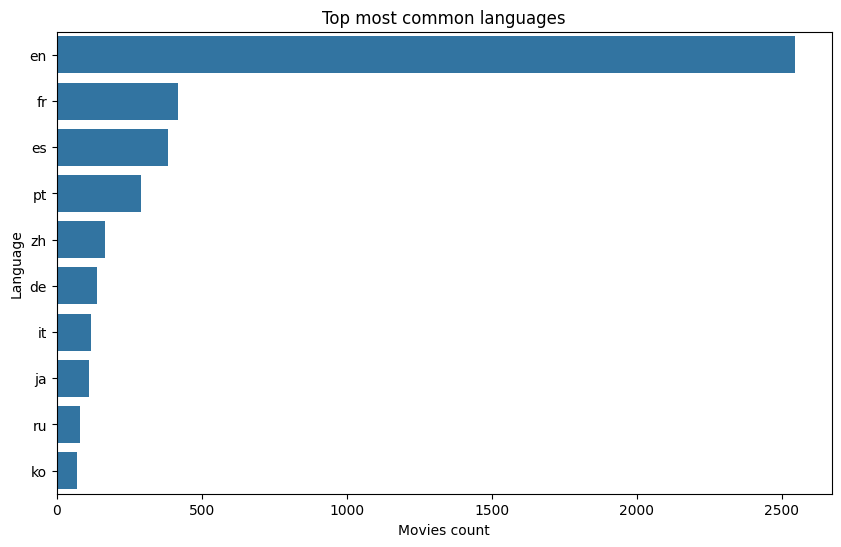

In [8]:
# Plot the top languages
plt.figure(figsize=(10, 6))
sns.barplot(data=top_languages, x='num_movies', y='original_language')
plt.title('Top most common languages')
plt.xlabel('Movies count')
plt.ylabel('Language')
plt.show()

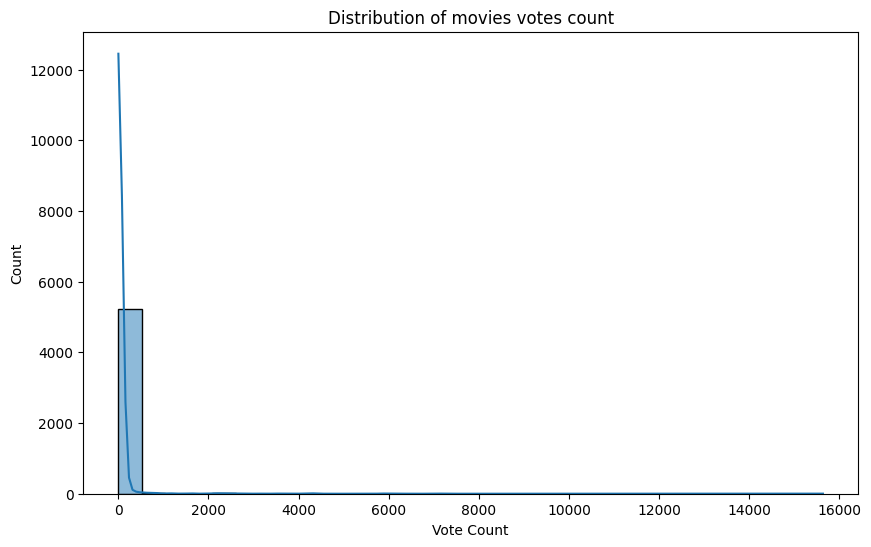

In [9]:
# Plot the distribution of the vote_count
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_count'], bins=30, kde=True)
plt.title('Distribution of movies votes count')
plt.xlabel('Vote Count')
plt.ylabel('Count')
plt.show()

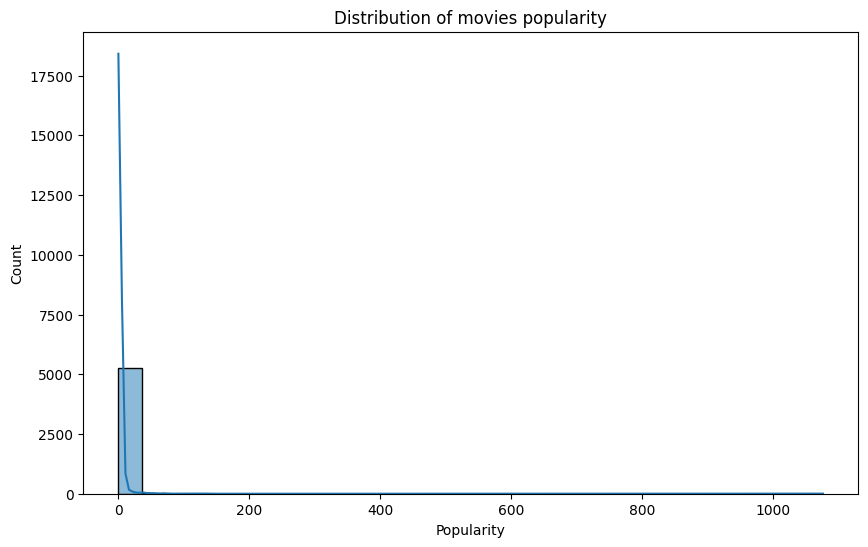

In [10]:
# Plot the distribution of the popularity of the movies
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['popularity'], bins=30, kde=True)
plt.title('Distribution of movies popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

## Top movies by popularity

In [11]:
query = """
    SELECT title, popularity
    FROM movies
    ORDER BY popularity DESC
    LIMIT 10;
"""
popular_movies = query_db(query, db_path)
popular_movies

,title,popularity
0,Final Destination Bloodlines,1075.9213
1,STRAW,501.8777
2,Predator: Killer of Killers,438.9421
3,Lilo & Stitch,430.0868
4,The Accountant²,378.3110
5,How to Train Your Dragon,338.6434
6,Deep Cover,275.5161
7,Clown in a Cornfield,258.5491
8,Sinners,243.1523
9,K.O.,234.3237


<Axes: xlabel='popularity', ylabel='title'>

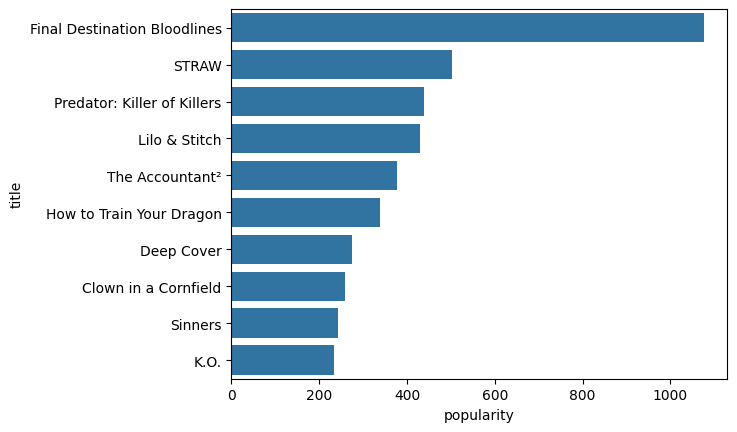

In [12]:
sns.barplot(x='popularity', y='title', data=popular_movies)

## Top languages by popularity

In [13]:
query = """
    SELECT original_language, AVG(popularity) AS avg_popularity
    FROM movies
    GROUP BY original_language
    ORDER BY avg_popularity DESC
    LIMIT 10;
"""
popular_languages = query_db(query, db_path)
popular_languages

,original_language,avg_popularity
0,no,9.271219
1,bn,4.020858
2,lv,3.914233
3,en,2.932569
4,ga,2.701500
5,ko,1.850700
6,te,1.613058
7,da,1.380332
8,ja,1.284056
9,ar,1.274921


<Axes: xlabel='avg_popularity', ylabel='original_language'>

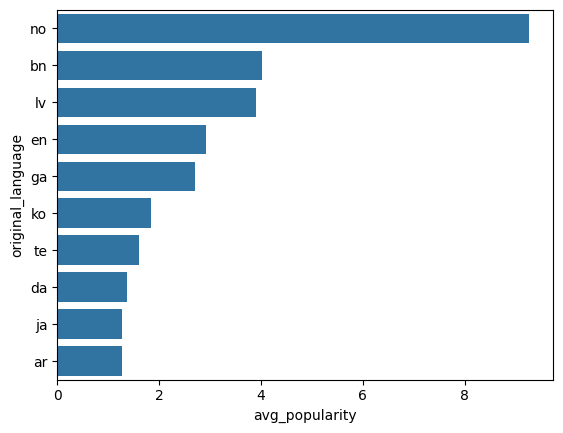

In [14]:
sns.barplot(x='avg_popularity', y='original_language', data=popular_languages)

In [15]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Bin vote_average into integer bins from 1 to 10
query = """
    SELECT original_language, 
           CAST(vote_average AS INTEGER) AS vote_bin,
           COUNT(*) AS num_movies
    FROM movies
    WHERE vote_average >= 1 AND vote_average <= 10
    GROUP BY original_language, vote_bin
    ORDER BY original_language, vote_bin;
"""
vote_bins = query_db(query, db_path)

# Get unique languages for the selector
languages = sorted(vote_bins['original_language'].unique())

# Create a dropdown selector
lang_selector = widgets.Dropdown(
    options=languages,
    value=languages[0],
    description='Language:',
    style={'description_width': 'initial'}
)

def plot_vote_bins(selected_lang):
    filtered = vote_bins[vote_bins['original_language'] == selected_lang]
    fig = px.bar(
        filtered,
        x='vote_bin',
        y='num_movies',
        labels={'vote_bin': 'Vote Average (bin)', 'num_movies': 'Number of Movies'},
        title=f'Number of Movies per Vote Average Bin for "{selected_lang}"'
    )
    fig.update_layout(xaxis=dict(dtick=1))
    fig.show()

widgets.interact(plot_vote_bins, selected_lang=lang_selector)


interactive(children=(Dropdown(description='Language:', options=('ar', 'az', 'bn', 'ca', 'cn', 'cs', 'da', 'de…

<function __main__.plot_vote_bins(selected_lang)>

In [16]:
query = """
        SELECT m.title, m.popularity, g.genre_name
        FROM movies as m
        JOIN movies_genres AS mg
        ON m.id = mg.movie_id
        LEFT JOIN genres as g
        ON mg.genre_id = g.genre_id
        WHERE g.genre_name = "Horror"
        LIMIT 10
    """
genres = query_db(query, db_path)

In [17]:
genres

,title,popularity,genre_name
0,Final Destination Bloodlines,1075.9213,Horror
1,Clown in a Cornfield,258.5491,Horror
2,Sinners,243.1523,Horror
3,The Ugly Stepsister,127.6963,Horror
4,Fear Below,87.8361,Horror
5,Until Dawn,74.8871,Horror
6,The Containment,57.1090,Horror
7,28 Years Later,50.4976,Horror
8,Rosario,47.4500,Horror
9,Fear Street: Prom Queen,44.5635,Horror


In [20]:
query_db("""
    SELECT g.genre_name, ROUND(AVG(m.vote_average), 2) AS avg_rating
    FROM movies m
    JOIN movies_genres mg ON m.id = mg.movie_id
    JOIN genres g ON mg.genre_id = g.genre_id
    WHERE m.vote_average > 0
    GROUP BY g.genre_name
    ORDER BY avg_rating DESC;
""", db_path)

,genre_name,avg_rating
0,Music,7.96
1,Documentary,7.89
2,History,7.47
3,Family,7.46
4,Science Fiction,7.39
5,Drama,7.37
6,Mystery,7.22
7,Comedy,7.16
8,Animation,7.13
9,Crime,7.08


In [31]:
movies_df[movies_df['vote_average'] > 0]

,id,title,release_date,original_language,adult,video,popularity,overview,vote_average,vote_count
0,1,Final Destination Bloodlines,2025-05-14,en,0,0,1075.9213,"Plagued by a violent recurring nightmare, coll...",7.118,777
1,2,STRAW,2025-06-05,en,0,0,501.8777,What will be her last straw? A devastatingly b...,8.101,467
2,3,Predator: Killer of Killers,2025-06-05,en,0,0,438.9421,While three of the fiercest warriors in human ...,7.981,515
3,4,Lilo & Stitch,2025-05-17,en,0,0,430.0868,The wildly funny and touching story of a lonel...,7.088,647
4,5,The Accountant²,2025-04-23,en,0,0,378.3110,"When an old acquaintance is murdered, Wolff is...",7.200,804
...,...,...,...,...,...,...,...,...,...,...
5244,5245,Stella Mosefund,2025-05-13,en,0,0,0.0143,Experimental short film about alter ego Stella...,7.000,1
5245,5246,7Spade,2025-05-11,en,0,0,0.0000,7Spade was once the greatest magician in the w...,9.000,1
5250,5251,MDNA,2025-05-12,el,0,0,0.0000,A no-storyline short film based on Christian o...,10.000,1
5253,5254,CI/LU,2025-05-09,pt,0,0,0.0000,,5.000,1


In [32]:
top_5_languages = movies_df['original_language'].value_counts().head(5).index
top_5_lang_df = movies_df.loc[movies_df['original_language'].isin(top_5_languages)]
top_5_lang_df = top_5_lang_df[top_5_lang_df['vote_average'] > 0]

fig = px.box(top_5_lang_df, 
             x='original_language', 
             y='vote_average',
             title='Vote Average Distribution for Top 5 Most Common Languages',
             labels={'original_language': 'Original Language', 'vote_average': 'Vote Average'})
fig.show()


In [35]:
import plotly.express as px

# Bin vote_average into integer bins from 1 to 10
vote_bins = movies_df[movies_df['vote_average']>=1]
vote_bins = vote_bins['vote_average'].clip(lower=1, upper=10).astype(int)
bin_counts = vote_bins.value_counts().sort_index()

# Prepare DataFrame for plotly
bin_df = bin_counts.reset_index()
bin_df.columns = ['vote_bin', 'count']

fig = px.bar(
    bin_df,
    x='count',
    y='vote_bin',
    orientation='h',
    labels={'count': 'Count', 'vote_bin': 'Vote Average (Binned 1-10)'},
    title='Number of Movies per Vote Average Bin'
)
fig.update_layout(yaxis=dict(dtick=1))
fig.show()

